# Import Package

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from helpers.evaluate_cart_model import evaluate_cart_model

# Import Data

In [30]:
name = "paris_weekends"
data_name = f"{name}.csv"

In [31]:
path = f"./data/resolved_data/airbnb/{data_name}"
df = pd.read_csv(path, sep=';')

# Classification

In [32]:
df['price_label'] = (df['realSum'] > df['realSum'].median()).astype(int)
print(df['price_label'].value_counts())

price_label
0    1781
1    1777
Name: count, dtype: int64


In [33]:
X_cls = df.drop(columns=['realSum', 'price_label', 'Unnamed: 0', 'attr_index_norm', 'rest_index_norm'])
y_cls = df['price_label']
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
print("Train:", X_cls_train.shape, " Test:", X_cls_test.shape)

Train: (2846, 16)  Test: (712, 16)


Classification Results
Số mẫu dự đoán đúng: 550/712 (77.25%)

Confusion Matrix:
 [[262  78]
 [ 84 288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       340
           1       0.79      0.77      0.78       372

    accuracy                           0.77       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.77      0.77      0.77       712



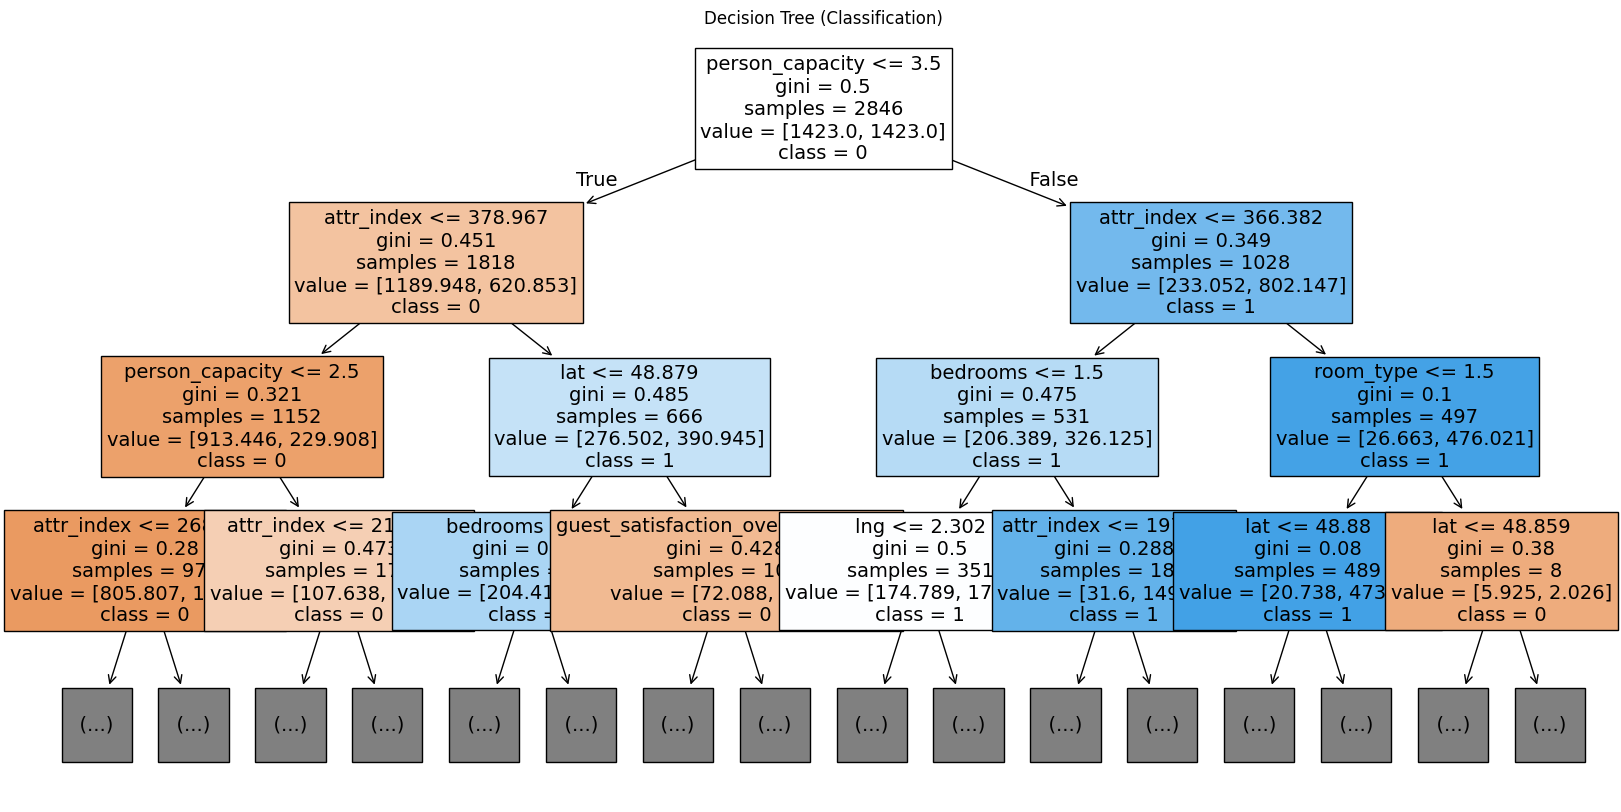


Model saved to: ./models/airbnb/paris_weekends_clf_model.joblib


In [34]:
cart_clf = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)

model, y_pred = evaluate_cart_model(
    model=cart_clf,
    X_train=X_cls_train,
    y_train=y_cls_train,
    X_test=X_cls_test,
    y_test=y_cls_test,
    task='classification',
    plot_depth=3,
    path=f"./models/airbnb/{name}_clf_model.joblib"  # lưu model vào file
)

# Regression

In [35]:
# Regression
X_rgs = df.drop(columns=['realSum', 'Unnamed: 0', 'attr_index_norm', 'rest_index_norm'])
y_rgs = df['realSum']

X_rgs_train, X_rgs_test, y_rgs_train, y_rgs_test = train_test_split(X_rgs, y_rgs, test_size=0.2, random_state=42)
print("Train:", X_rgs_train.shape, " Test:", X_rgs_test.shape)

Train: (2846, 17)  Test: (712, 17)


Regression Results
R² score: 0.5913044020007823
MAE: 94.24510421737085
RMSE: 184.0952158426245


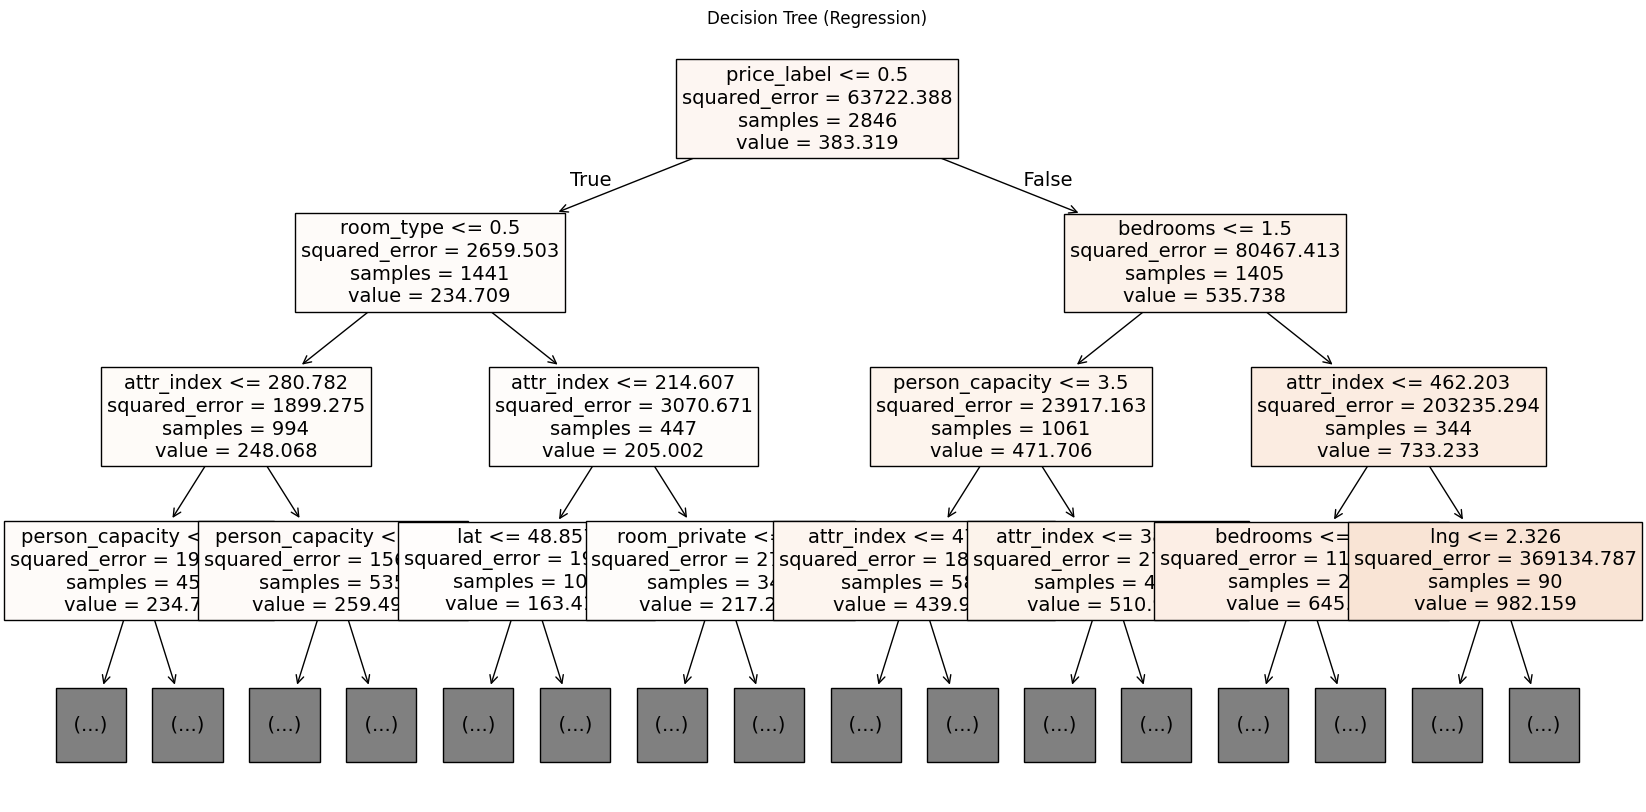


Model saved to: ./models/airbnb/paris_weekends_rgs_model.joblib


In [36]:
cart_rgs = DecisionTreeRegressor(max_depth=6, random_state=42)

model, y_pred = evaluate_cart_model(
    model=cart_rgs,
    X_train=X_rgs_train,
    y_train=y_rgs_train,
    X_test=X_rgs_test,
    y_test=y_rgs_test,
    task='regression',
    plot_depth=3,
    path=f"./models/airbnb/{name}_rgs_model.joblib"  # lưu model vào file
)